In [58]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [59]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

# Background

The cifar-10 dataset consists of 60,000 color images in 10 classes. The classes are balanced, with exactly 6,000 images for each class. 

Typically, there are 50,000 training images and 10,000 test images.

The images themselves are colored and consist of 32 by 32 pixels. The color format is red, green, and blue.

[Source](https://www.cs.toronto.edu/~kriz/cifar.html)

# Inspecting Images

In [60]:
batch_size = 1

transform = transforms.Compose(
    [transforms.ToTensor()])

transform = transforms.Compose(
    [transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [61]:
def imshow(img):
    #img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

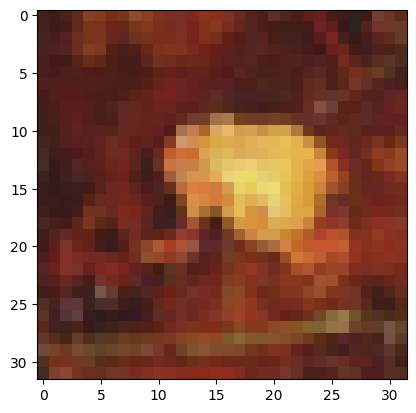

In [62]:
# load some images from the training set
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [63]:
# print the classes of those images:
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

frog 


# Color Distributions

In [64]:
def get_norm_dist(values):
    mu = values.mean()
    sigma = values.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    return x,stats.norm.pdf(x, mu, sigma)

In [65]:
# Capture Color 
colors = dict()

for idx in range(0,10):
    colors[idx] = {
        "red":None,
        "blue": None,
        "green": None
    }

for image, label in trainloader:
    
    image = image.numpy()
    
    if colors[int(label)]["red"] is None:
        colors[int(label)]["red"] = image[0][0]
    else:
        colors[int(label)]["red"] = np.vstack((colors[int(label)]["red"], image[0][0]))
        
    if colors[int(label)]["green"] is None:
        colors[int(label)]["green"] = image[0][1]
    else:
        colors[int(label)]["green"] = np.vstack((colors[int(label)]["green"], image[0][1]))
        
    if colors[int(label)]["blue"] is None:
        colors[int(label)]["blue"] = image[0][2]
    else:
        colors[int(label)]["blue"] = np.vstack((colors[int(label)]["blue"], image[0][2]))

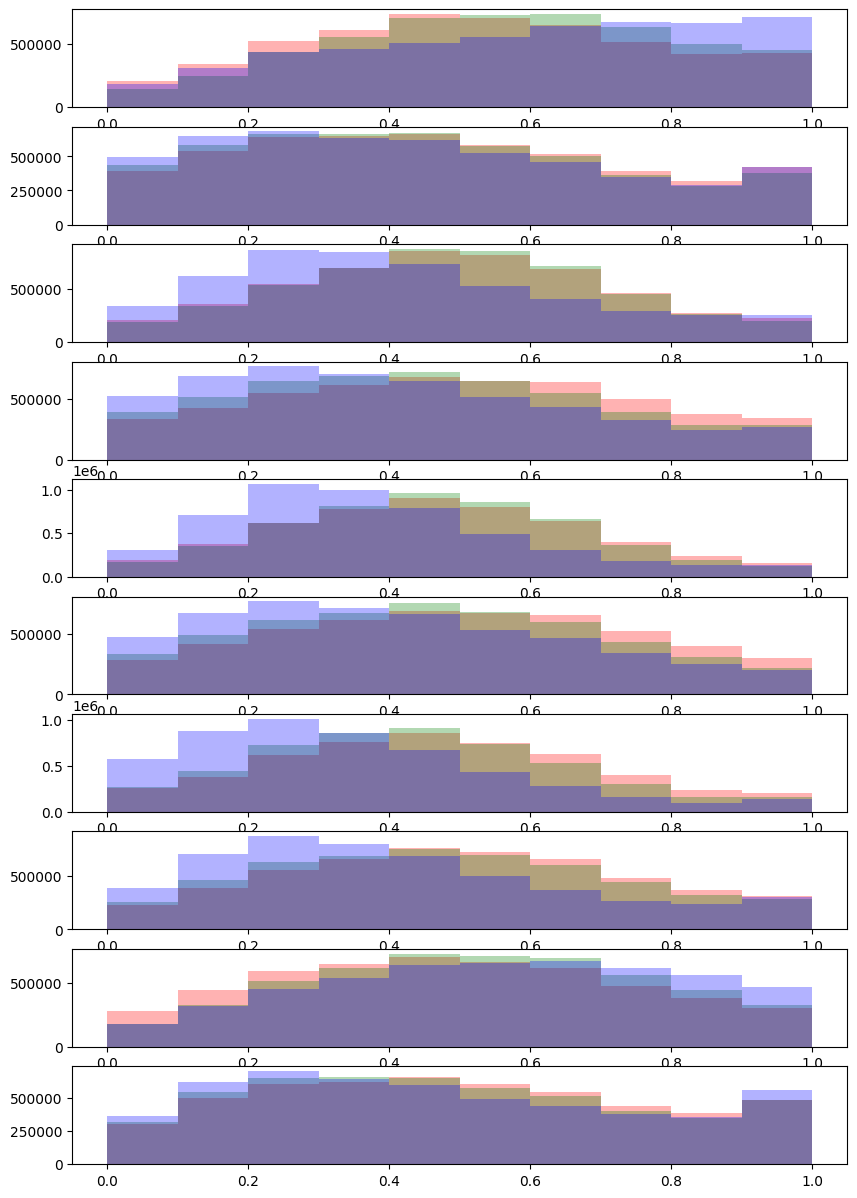

In [78]:
fig, axs = plt.subplots(10, 1, figsize=(10, 15))
for idx, ax in enumerate(axs):
    red = colors[idx]['red'].flatten()
    ax.hist(red, color = 'red', alpha = 0.3, bins = 10)
    greeen = colors[idx]['green'].flatten()
    ax.hist(greeen, color = 'green', alpha = 0.3, bins = 10)
    blue = colors[idx]['blue'].flatten()
    ax.hist(blue, color = 'blue', alpha = 0.3, bins = 10)